In [1]:
%matplotlib inline

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import IFrame
from IPython.display import FileLink

In [3]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

In [93]:
fig_prefix = "../figures/2017-03-01-tm-"

In [105]:
IFrame('http://www.phmsa.dot.gov/pipeline/library/data-stats', width = 700, height = 350)

In [107]:
FileLink("../../data_sets/phmsa/raw/accident_hazardous_liquid_jan2010_present/accident_hazardous_liquid_jan2010_present.txt")

C:\Users\tmadu\Dropbox\46_data_science\data_sets\phmsa\raw\accident_hazardous_liquid_jan2010_present\accident_hazardous_liquid_jan2010_present.txt

In [5]:
incidents = pd.read_table('../../data_sets/phmsa/raw/accident_hazardous_liquid_jan2010_present/accident_hazardous_liquid_jan2010_present.txt',
                           encoding='windows-1252', parse_dates=['LOCAL_DATETIME'])

C:\Users\tmadu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (64,65,66,67,73,78,79,82,90,91,105,139,140,172,182,210,212,240,284,294,297,302,308,310,312,314,322,335,337,343,375,376,381,383,385,390,408,409,410,411,413,415,430,431,434,437,451,468,469,475,476,477,480,481,482,498,509,516,522,530,535,537,553,554) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
incident_vol = incidents[['LOCAL_DATETIME','NAME','REPORT_TYPE','ON_OFF_SHORE','CAUSE','CAUSE_DETAILS','SYSTEM_PART_INVOLVED','ITEM_INVOLVED','LOCATION_LATITUDE', 'LOCATION_LONGITUDE', 'COMMODITY_RELEASED_TYPE', 'UNINTENTIONAL_RELEASE_BBLS', 'RECOVERED_BBLS']]
incident_vol.head(3)

,LOCAL_DATETIME,NAME,REPORT_TYPE,ON_OFF_SHORE,CAUSE,CAUSE_DETAILS,SYSTEM_PART_INVOLVED,ITEM_INVOLVED,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS
0,2017-01-09 07:40:00,ENTERPRISE CRUDE PIPELINE LLC,SUPPLEMENTAL FINAL,ONSHORE,INCORRECT OPERATION,EQUIPMENT NOT INSTALLED PROPERLY,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,TUBING,29.305410,-97.400301,CRUDE OIL,4.00,4.00
1,2017-01-03 10:00:00,MARATHON PIPE LINE LLC,ORIGINAL,ONSHORE,OTHER INCIDENT CAUSE,UNKNOWN,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,"WELD, INCLUDING HEAT-AFFECTED ZONE",40.631074,-80.440463,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.20,0.20
2,2017-01-03 08:25:00,PHILLIPS 66 PIPELINE LLC,ORIGINAL,ONSHORE,INCORRECT OPERATION,OTHER INCORRECT OPERATION,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,OTHER,39.796206,-104.943911,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.19,0.19


In [109]:
incident_vol['NAME'].nunique()

229

In [28]:
mask = ~incident_vol['COMMODITY_RELEASED_TYPE'].str.contains('HVL ')

In [29]:
incid_vol_liquid_and_co2 = incident_vol[mask]

In [30]:
mask2 = ~incid_vol_liquid_and_co2['COMMODITY_RELEASED_TYPE'].str.contains('CO2')
incid_vol_liquid = incid_vol_liquid_and_co2[mask2]
#incid_vol_liquid['COMMODITY_RELEASED_TYPE']

In [31]:
incid_vol_liquid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340 entries, 0 to 2794
Data columns (total 13 columns):
LOCAL_DATETIME                2340 non-null datetime64[ns]
NAME                          2340 non-null object
REPORT_TYPE                   2340 non-null object
ON_OFF_SHORE                  2340 non-null object
CAUSE                         2340 non-null object
CAUSE_DETAILS                 2340 non-null object
SYSTEM_PART_INVOLVED          2340 non-null object
ITEM_INVOLVED                 2340 non-null object
LOCATION_LATITUDE             2340 non-null float64
LOCATION_LONGITUDE            2340 non-null float64
COMMODITY_RELEASED_TYPE       2340 non-null object
UNINTENTIONAL_RELEASE_BBLS    2340 non-null float64
RECOVERED_BBLS                2340 non-null float64
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 255.9+ KB


In [110]:
incid_vol_liquid['NAME'].nunique()

191

In [111]:
incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'].sum()

317619.37999999983

In [112]:
incid_vol_liquid['RECOVERED_BBLS'].sum()

208197.21000000002

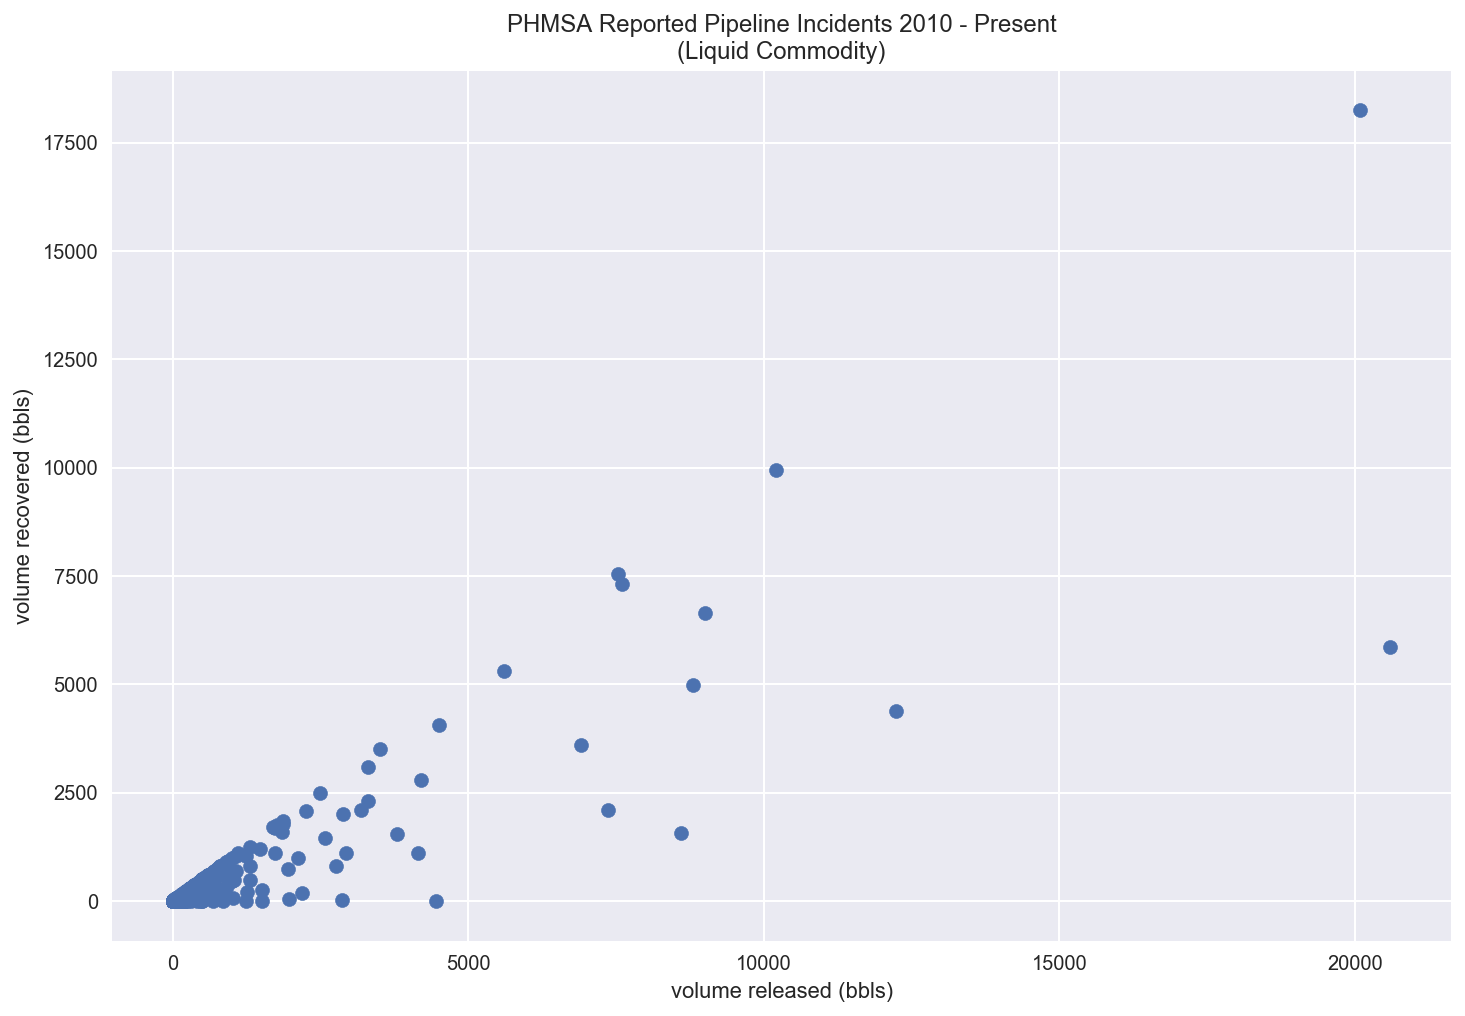

In [95]:
plt.scatter(incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'], incid_vol_liquid['RECOVERED_BBLS'])
plt.xlabel('volume released (bbls)')
plt.ylabel('volume recovered (bbls)')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-released-v-recovered.png", dpi=350) 

In [33]:
mask3 = incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'] > 20000

In [34]:
incid_vol_liquid[mask3]

,LOCAL_DATETIME,NAME,REPORT_TYPE,ON_OFF_SHORE,CAUSE,CAUSE_DETAILS,SYSTEM_PART_INVOLVED,ITEM_INVOLVED,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS
1475,2013-07-29 00:00:00,TESORO HIGH PLAINS PIPELINE COMPANY LLC,SUPPLEMENTAL FINAL,ONSHORE,NATURAL FORCE DAMAGE,LIGHTNING,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,48.524251,-102.856912,CRUDE OIL,20600.0,5856.0
2601,2010-07-25 17:58:00,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPPLEMENTAL FINAL,ONSHORE,MATERIAL FAILURE OF PIPE OR WELD,ENVIRONMENTAL CRACKING-RELATED,"ONSHORE PIPELINE, INCLUDING VALVE SITES",PIPE,42.243290,-84.972510,CRUDE OIL,20082.0,18245.0


In [35]:
incidents.iloc[1475]

REPORT_RECEIVED_DATE                                                  10/29/2013
IYEAR                                                                       2013
REPORT_NUMBER                                                           20130353
SUPPLEMENTAL_NUMBER                                                        19930
REPORT_TYPE                                                   SUPPLEMENTAL FINAL
OPERATOR_ID                                                                31570
NAME                                     TESORO HIGH PLAINS PIPELINE COMPANY LLC
OPERATOR_STREET_ADDRESS                                 19100 RIDGEWOOD PARKWAY 
OPERATOR_CITY_NAME                                                   SAN ANTONIO
OPERATOR_STATE_ABBREVIATION                                                   TX
OPERATOR_POSTAL_CODE                                                       78259
LOCAL_DATETIME                                               2013-07-29 00:00:00
LOCATION_LATITUDE           

In [36]:
incid_vol_liquid.to_csv('incidents.csv')

In [37]:
incid_vol_liquid['PERCENT_RECOV'] = (incid_vol_liquid['RECOVERED_BBLS'] / incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS']) * 100
incid_vol_liquid['PERCENT_RECOV'].head()

C:\Users\tmadu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0    100.0
1    100.0
2    100.0
3    100.0
5    100.0
Name: PERCENT_RECOV, dtype: float64

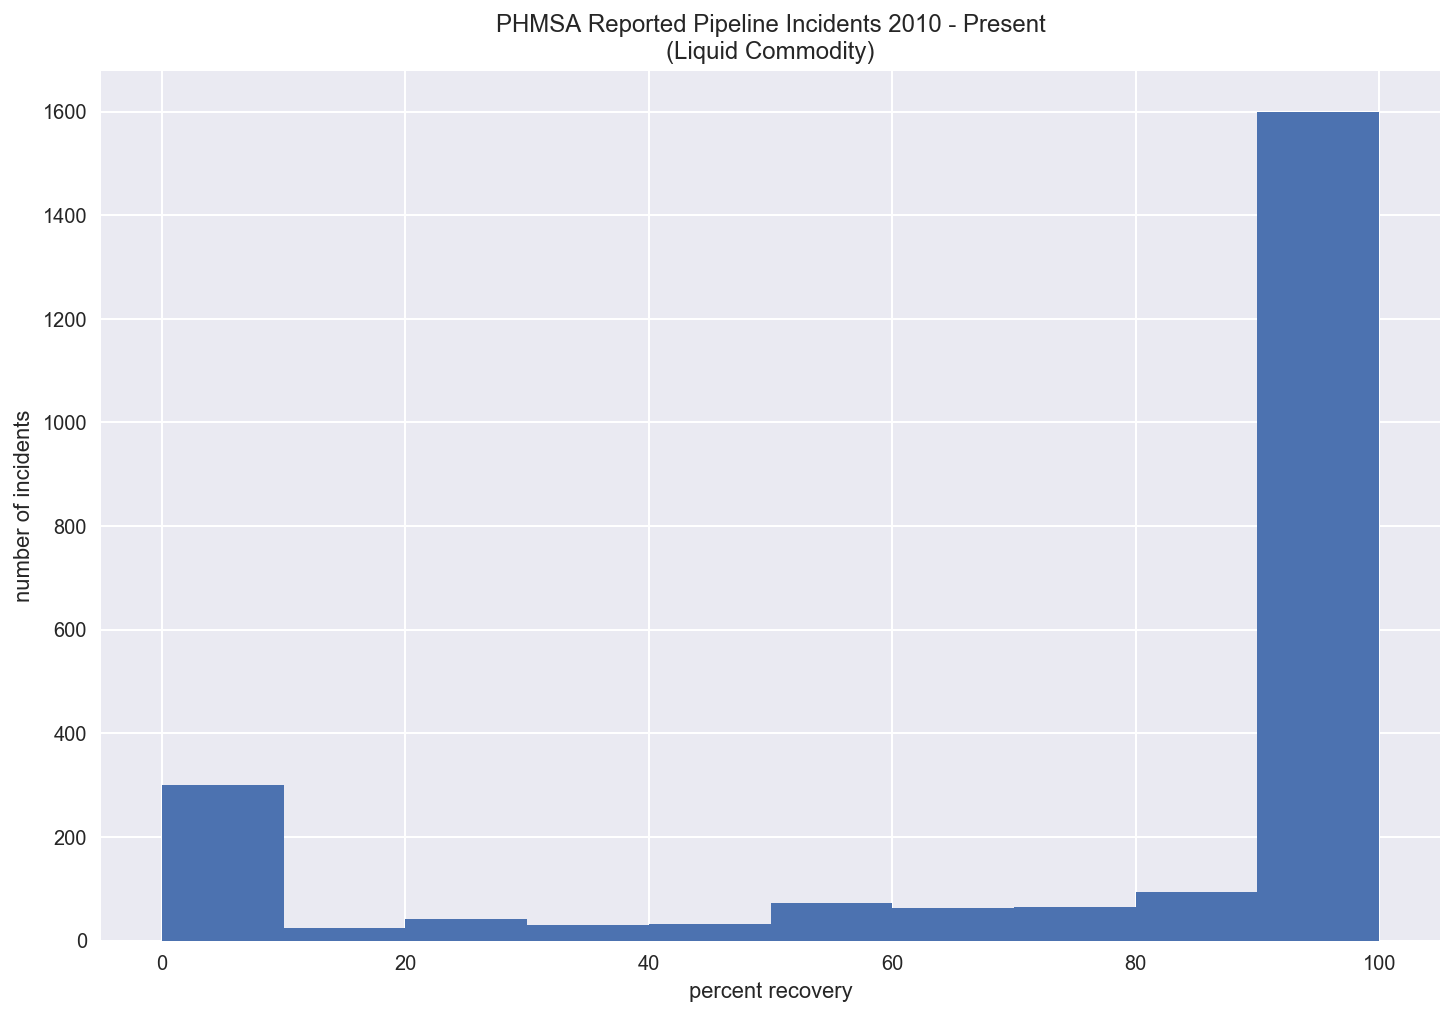

In [101]:
incid_vol_liquid['PERCENT_RECOV'].plot(kind = 'hist', bins = 10)
plt.xlabel('percent recovery')
plt.ylabel('number of incidents')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-percent-recovery.png", dpi=350)

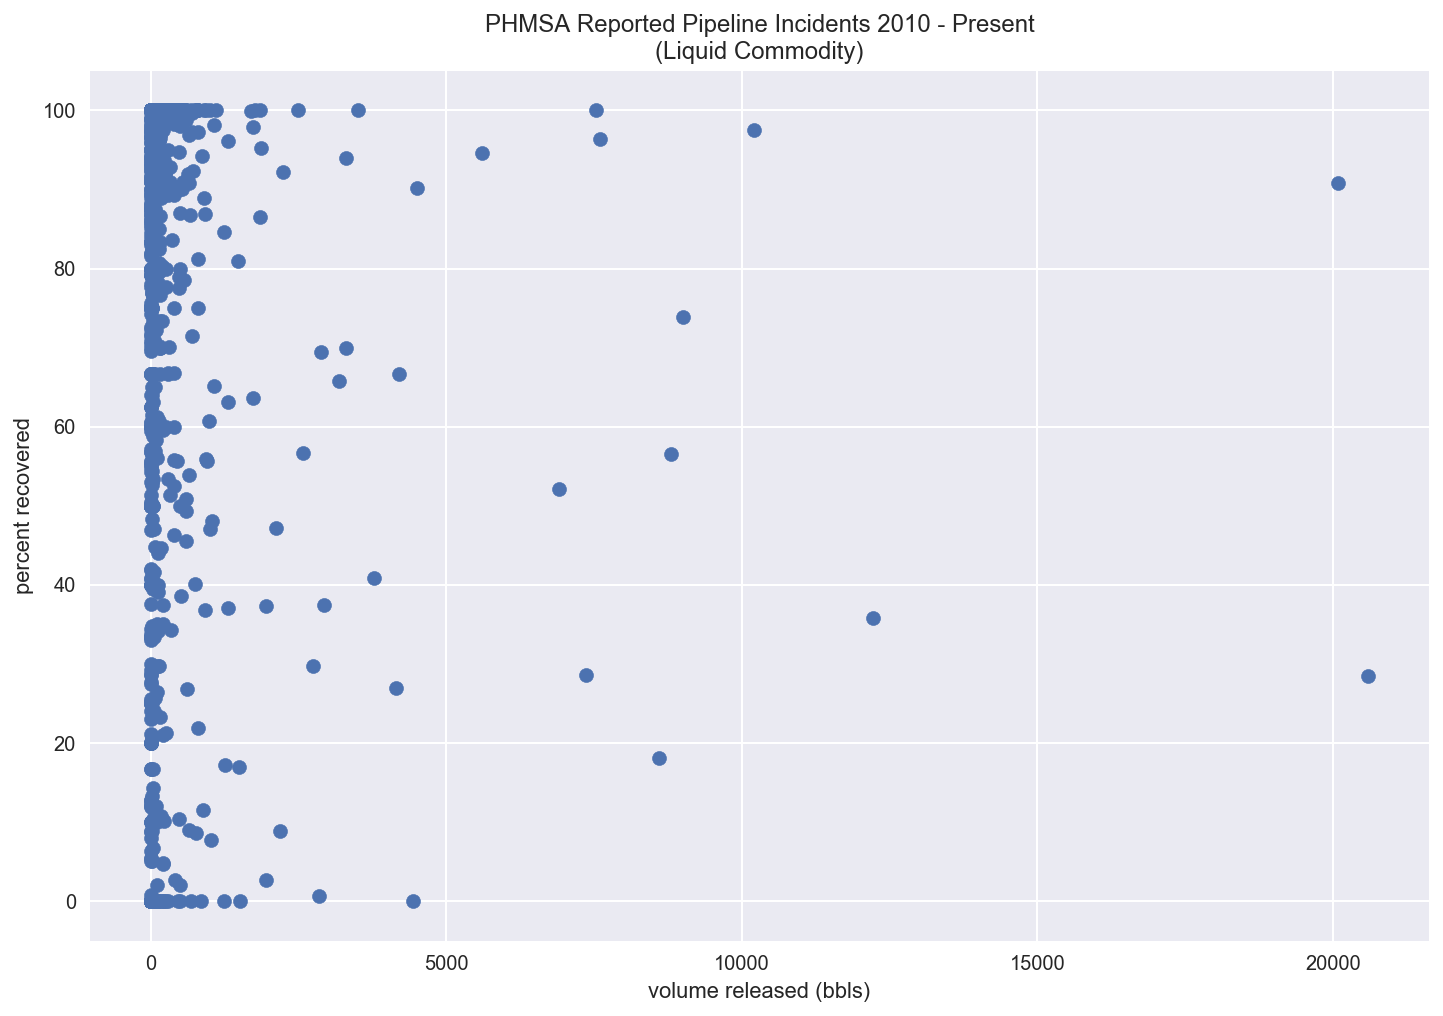

In [97]:
plt.scatter(incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'], incid_vol_liquid['PERCENT_RECOV'])
plt.xlabel('volume released (bbls)')
plt.ylabel('percent recovered')
plt.title('PHMSA Reported Pipeline Incidents 2010 - Present\n(Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-percent-recovered-by-vol-released.png", dpi=350)

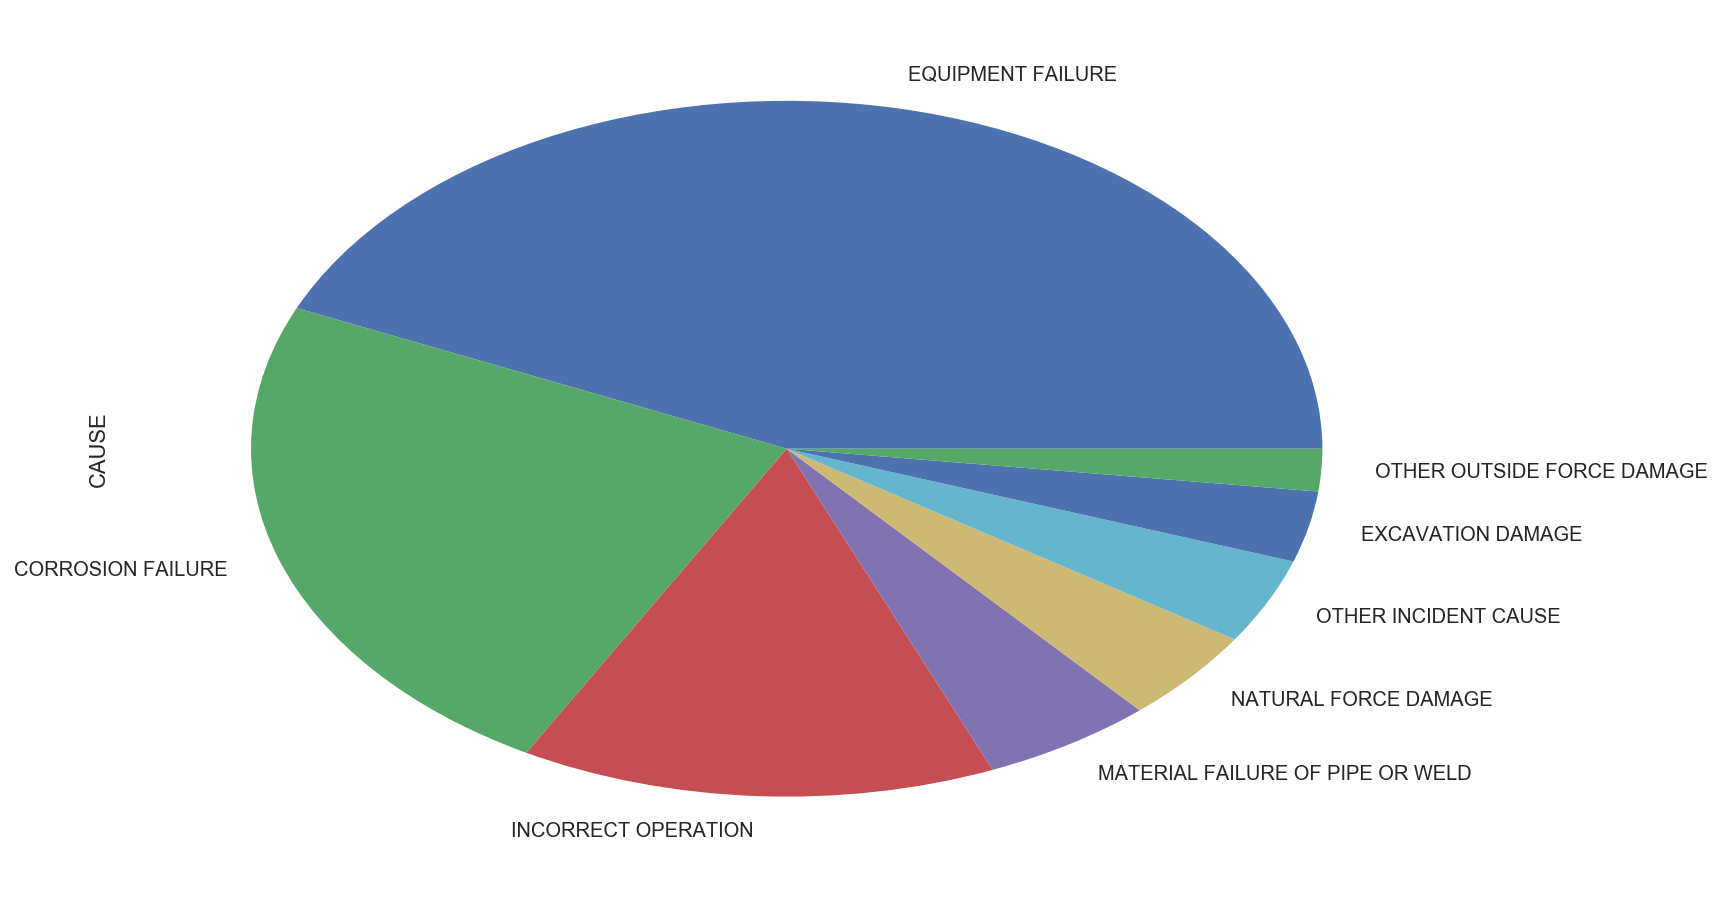

In [98]:
incid_vol_liquid['CAUSE'].value_counts().plot(kind = 'pie')
plt.savefig(fig_prefix + "major-incident-causes-pie.png", dpi=350)

In [41]:
incid_vol_liquid.columns

Index(['LOCAL_DATETIME', 'NAME', 'REPORT_TYPE', 'ON_OFF_SHORE', 'CAUSE',
       'CAUSE_DETAILS', 'SYSTEM_PART_INVOLVED', 'ITEM_INVOLVED',
       'LOCATION_LATITUDE', 'LOCATION_LONGITUDE', 'COMMODITY_RELEASED_TYPE',
       'UNINTENTIONAL_RELEASE_BBLS', 'RECOVERED_BBLS', 'PERCENT_RECOV'],
      dtype='object')

In [45]:
incid_vol_liquid[['CAUSE', 'CAUSE_DETAILS']]

,CAUSE,CAUSE_DETAILS
0,INCORRECT OPERATION,EQUIPMENT NOT INSTALLED PROPERLY
1,OTHER INCIDENT CAUSE,UNKNOWN
2,INCORRECT OPERATION,OTHER INCORRECT OPERATION
3,EQUIPMENT FAILURE,OTHER EQUIPMENT FAILURE
5,EQUIPMENT FAILURE,THREADED CONNECTION/COUPLING FAILURE
6,CORROSION FAILURE,INTERNAL CORROSION
7,EQUIPMENT FAILURE,NON-THREADED CONNECTION FAILURE
8,OTHER INCIDENT CAUSE,UNKNOWN
9,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT
10,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT


In [49]:
causes = incid_vol_liquid['CAUSE_DETAILS'].value_counts()
causes.head()

INTERNAL CORROSION                 358
PUMP OR PUMP-RELATED EQUIPMENT     259
NON-THREADED CONNECTION FAILURE    217
EXTERNAL CORROSION                 193
OTHER EQUIPMENT FAILURE            178
Name: CAUSE_DETAILS, dtype: int64

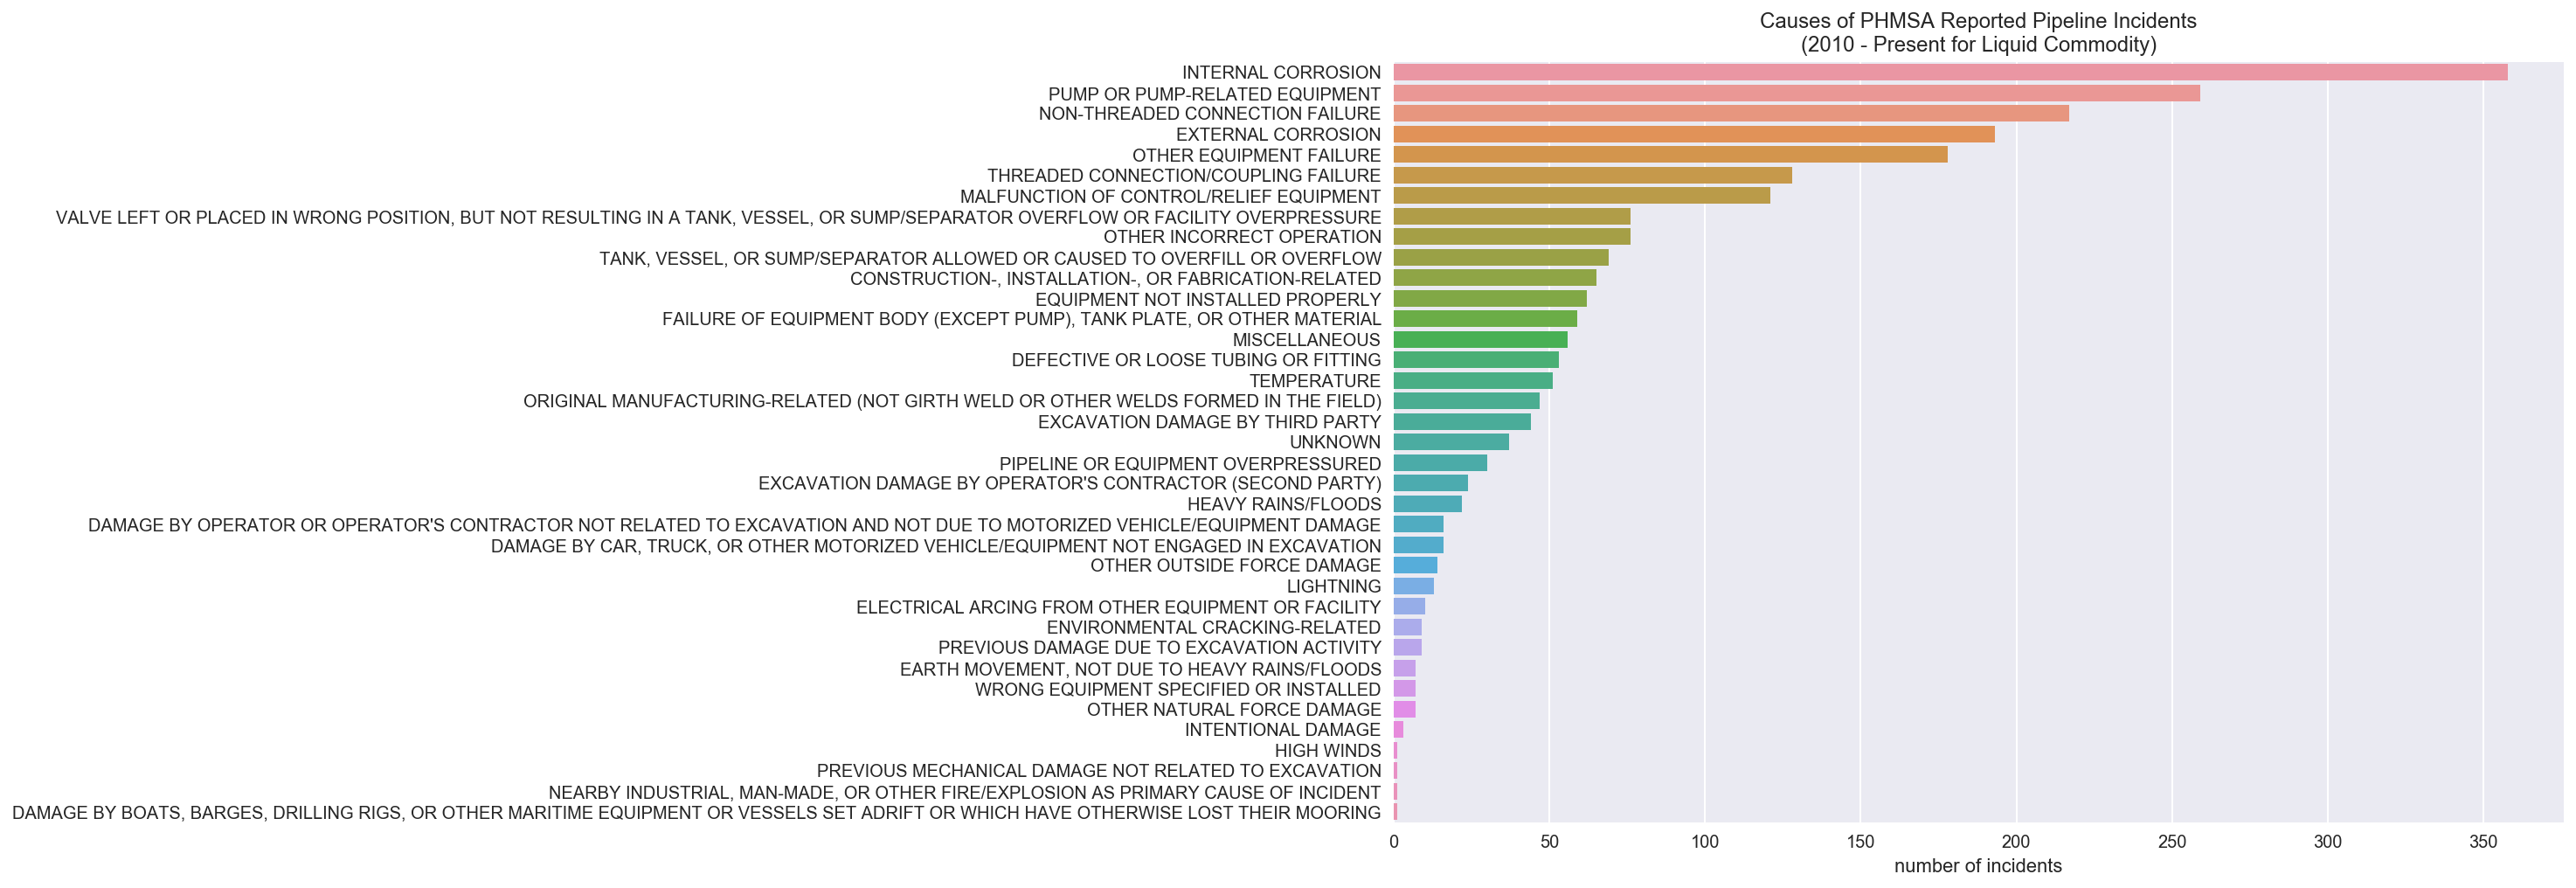

In [102]:
sns.barplot(causes.values, causes.index)
plt.xlabel('number of incidents')
plt.title('Causes of PHMSA Reported Pipeline Incidents\n(2010 - Present for Liquid Commodity)')
plt.savefig(fig_prefix + "frequency-of-causes.png", dpi=350)

In [61]:
incid_vol_liquid['UNINTENTIONAL_RELEASE_BBLS'].sum()

317619.37999999983

In [63]:
mask4 = incid_vol_liquid['CAUSE_DETAILS'] == 'INTERNAL CORROSION'

In [65]:
incid_ic = incid_vol_liquid[mask4]

In [68]:
incid_ic['UNINTENTIONAL_RELEASE_BBLS'].sum()

30453.940000000002

In [83]:
causes_dict = {}
for item in causes.index:
    item_bbl_sum = incid_vol_liquid[incid_vol_liquid['CAUSE_DETAILS'] == item]['UNINTENTIONAL_RELEASE_BBLS'].sum()
    print('Cause {} resulted in total releases of {} bbls from 2010 to present'.format(item, item_bbl_sum))
    causes_dict[item] = item_bbl_sum

Cause INTERNAL CORROSION resulted in total releases of 30453.940000000002 bbls from 2010 to present
Cause PUMP OR PUMP-RELATED EQUIPMENT resulted in total releases of 7576.059999999997 bbls from 2010 to present
Cause NON-THREADED CONNECTION FAILURE resulted in total releases of 20587.420000000002 bbls from 2010 to present
Cause EXTERNAL CORROSION resulted in total releases of 28068.870000000006 bbls from 2010 to present
Cause OTHER EQUIPMENT FAILURE resulted in total releases of 25950.14 bbls from 2010 to present
Cause THREADED CONNECTION/COUPLING FAILURE resulted in total releases of 12660.270000000002 bbls from 2010 to present
Cause MALFUNCTION OF CONTROL/RELIEF EQUIPMENT resulted in total releases of 2204.3399999999997 bbls from 2010 to present
Cause VALVE LEFT OR PLACED IN WRONG POSITION, BUT NOT RESULTING IN A TANK, VESSEL, OR SUMP/SEPARATOR OVERFLOW OR FACILITY OVERPRESSURE resulted in total releases of 2570.95 bbls from 2010 to present
Cause OTHER INCORRECT OPERATION resulted in

In [85]:
causes_dict

{'CONSTRUCTION-, INSTALLATION-, OR FABRICATION-RELATED': 6797.290000000001,
 'DAMAGE BY BOATS, BARGES, DRILLING RIGS, OR OTHER MARITIME EQUIPMENT OR VESSELS SET ADRIFT OR WHICH HAVE OTHERWISE LOST THEIR MOORING': 3.0,
 'DAMAGE BY CAR, TRUCK, OR OTHER MOTORIZED VEHICLE/EQUIPMENT NOT ENGAGED IN EXCAVATION': 3731.45,
 "DAMAGE BY OPERATOR OR OPERATOR'S CONTRACTOR NOT RELATED TO EXCAVATION AND NOT DUE TO MOTORIZED VEHICLE/EQUIPMENT DAMAGE": 656.73,
 'DEFECTIVE OR LOOSE TUBING OR FITTING': 1762.5700000000004,
 'EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS': 718.84,
 'ELECTRICAL ARCING FROM OTHER EQUIPMENT OR FACILITY': 3613.0,
 'ENVIRONMENTAL CRACKING-RELATED': 26156.16,
 'EQUIPMENT NOT INSTALLED PROPERLY': 2324.41,
 "EXCAVATION DAMAGE BY OPERATOR'S CONTRACTOR (SECOND PARTY)": 2941.43,
 'EXCAVATION DAMAGE BY THIRD PARTY': 23732.629999999997,
 'EXTERNAL CORROSION': 28068.870000000006,
 'FAILURE OF EQUIPMENT BODY (EXCEPT PUMP), TANK PLATE, OR OTHER MATERIAL': 3645.7599999999998,
 'HEAVY RAINS

In [91]:
causes_series = pd.Series(causes_dict).sort_values(ascending=False)
causes_series.head()

INTERNAL CORROSION                  30453.94
EXTERNAL CORROSION                  28068.87
ENVIRONMENTAL CRACKING-RELATED      26156.16
OTHER EQUIPMENT FAILURE             25950.14
EXCAVATION DAMAGE BY THIRD PARTY    23732.63
dtype: float64

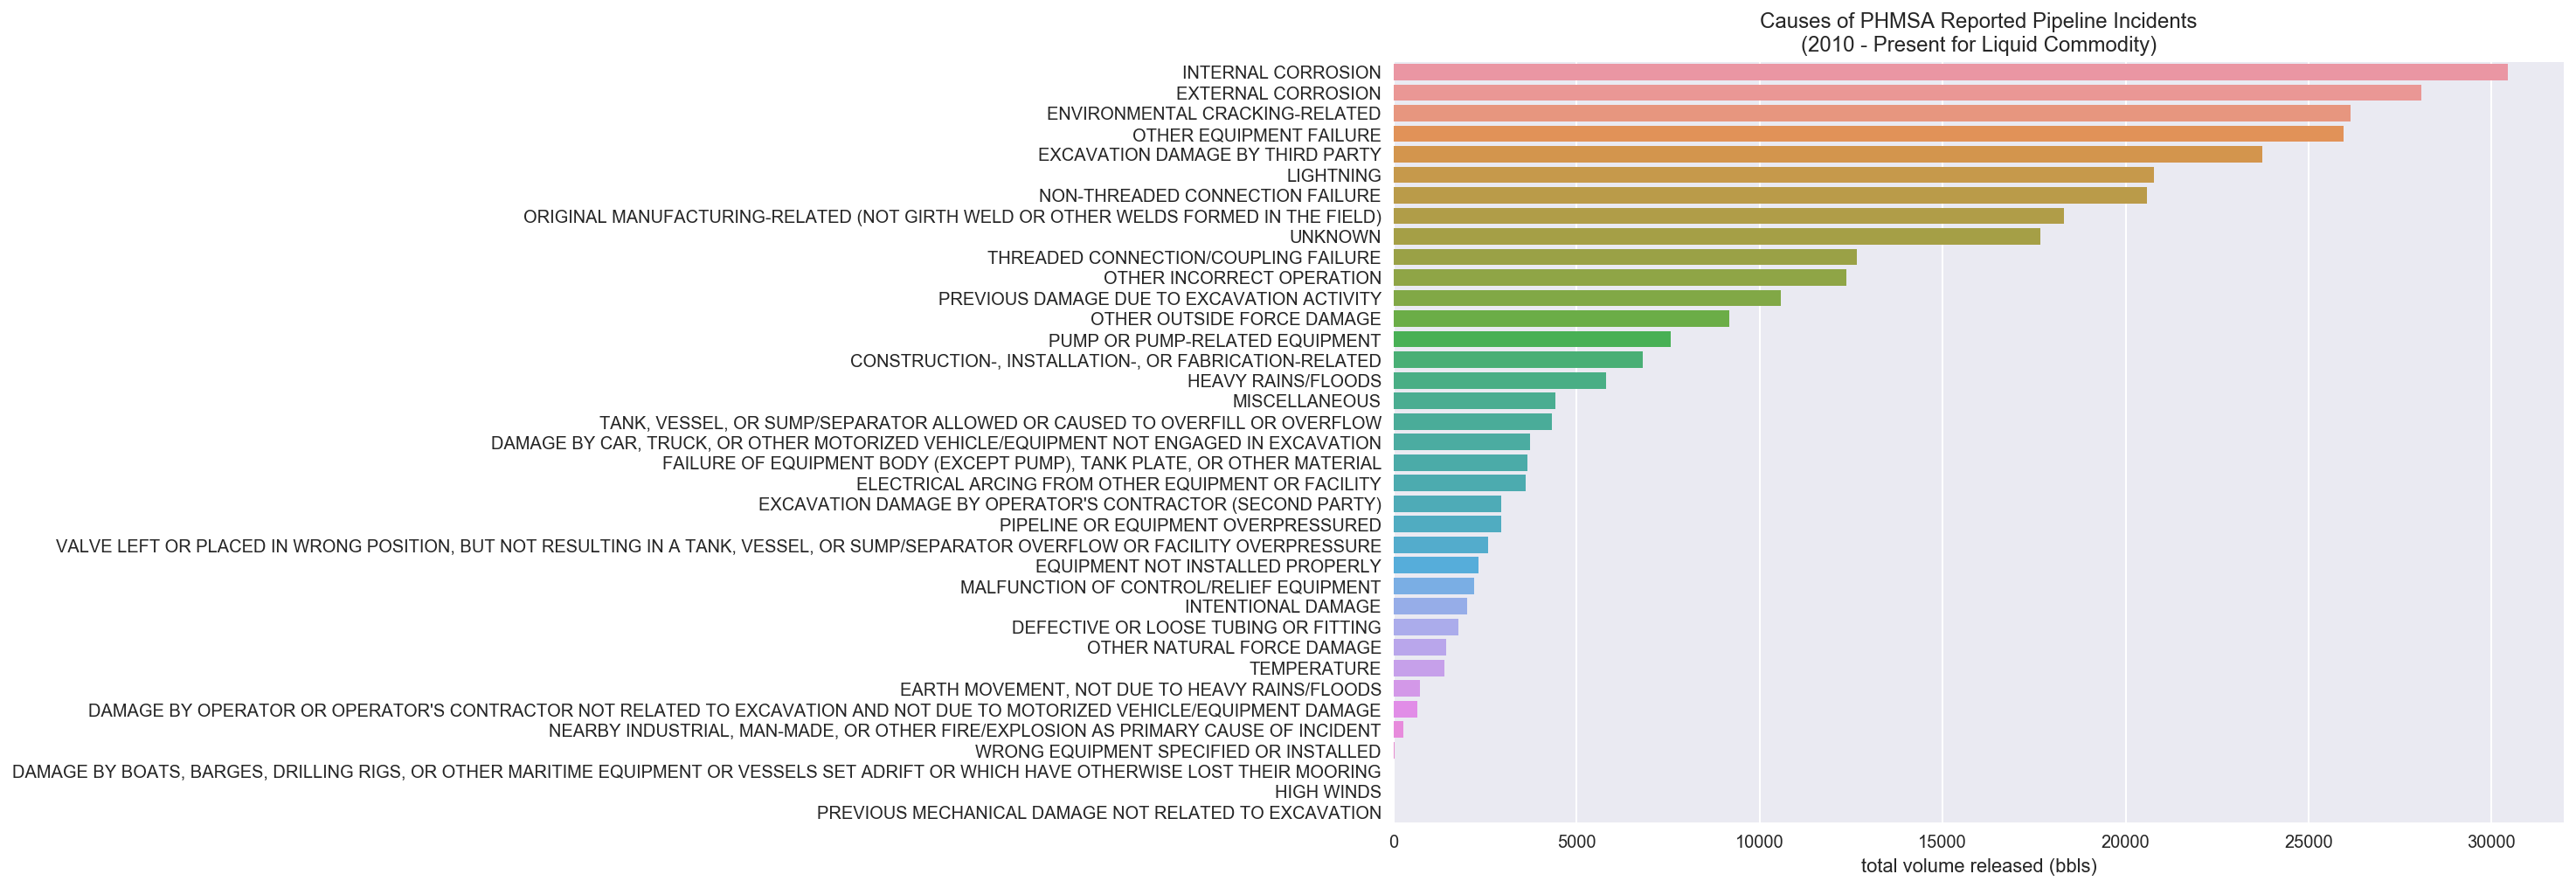

In [103]:
sns.barplot(causes_series.values, causes_series.index)
plt.xlabel('total volume released (bbls)')
plt.title('Causes of PHMSA Reported Pipeline Incidents\n(2010 - Present for Liquid Commodity)')
plt.savefig(fig_prefix + "liquid-released-by-cause.png", dpi=350)

In [116]:
mask5 = incidents['CAUSE_DETAILS'] == 'EXCAVATION DAMAGE BY THIRD PARTY'

In [121]:
incid_by_3rd_excav = incidents[mask5]
incid_by_3rd_excav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 53 to 2791
Columns: 588 entries, REPORT_RECEIVED_DATE to NARRATIVE
dtypes: datetime64[ns](1), float64(160), int64(5), object(422)
memory usage: 262.3+ KB


In [120]:
incid_by_3rd_excav['ROOT_CAUSE'].value_counts()

ONE-CALL NOTIFICATION PRACTICES NOT SUFFICIENT    30
EXCAVATION PRACTICES NOT SUFFICIENT               14
OTHER                                              8
LOCATING PRACTICES NOT SUFFICIENT                  3
DATA NOT COLLECTED                                 1
ONE-CALL NOTIFICATION CENTER ERROR                 1
Name: ROOT_CAUSE, dtype: int64

In [123]:
incid_by_3rd_excav['ONE_CALL_SUBTYPE'].value_counts()

NO NOTIFICATION MADE TO THE ONE-CALL CENTER                 25
NOTIFICATION TO ONE-CALL CENTER MADE, BUT NOT SUFFICIENT     4
WRONG INFORMATION PROVIDED                                   1
Name: ONE_CALL_SUBTYPE, dtype: int64

In [125]:
incid_by_3rd_excav['EXCAVATION_SUBTYPE'].value_counts()

EXCAVATION PRACTICES NOT SUFFICIENT (OTHER)             6
FAILURE TO USE HAND TOOLS WHERE REQUIRED                3
FAILURE TO VERIFY LOCATION BY TEST-HOLD (POT-HOLING)    2
FAILURE TO MAINTAIN CLEARANCE                           2
IMPROPER BACKFILLING                                    1
Name: EXCAVATION_SUBTYPE, dtype: int64